## Introduction.
    - A breif insight into GANs

Generative adversarial networks (GANs) are a type of deep learning model that can be used to generate new data, such as images, text, and music. GANs work by using two neural networks: a generator and a discriminator. The generator is trained to produce new data that looks like real data, while the discriminator is trained to distinguish between real and fake data.

The generator and discriminator are trained in a zero-sum game, where the generator tries to fool the discriminator into thinking that its fake data is real, and the discriminator tries to correctly identify real and fake data. As the two networks train against each other, they both get better at their respective tasks.

GANs have been used to generate a wide variety of data, including:

Images: GANs can be used to generate photorealistic images of people, places, and objects.
Text: GANs can be used to generate realistic-looking text, such as news articles, poems, and code.
Music: GANs can be used to generate new music in a variety of styles.
GANs are still under development, but they have the potential to revolutionize the way we create and interact with digital content.

Here is a simple example of how a GAN works:

The generator creates a new image of a cat.
The discriminator is shown the new image and asked to decide whether it is real or fake.
The discriminator incorrectly identifies the image as real.
The generator is rewarded for fooling the discriminator.
The discriminator is punished for making an incorrect prediction.
The generator and discriminator are both updated with the new information.
Steps 1-6 are repeated until the generator is able to consistently fool the discriminator.
Once the generator is trained, it can be used to generate new images of cats that are indistinguishable from real images.

GANs are a powerful new tool for generating realistic data, but they are also complex and difficult to train. Researchers are still working to improve the stability and performance of GANs, and to develop new ways to use them to generate different types of data.

### Importing the dependencies

In [1]:
# pip install Resource
# pip install tfds-nightly
# pip install tensorflow_datasets
# pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

In [2]:
# setting up the tensorflow gpu NOT to consuming the whole RAM by contrasting its growth to only what is been used.

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
# Looping through the gpus and limiting the memory growth
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# TF datasets [Fashon MNIST]
import tensorflow_datasets as tfds

# matplotlub for Visualization 
from matplotlib import pyplot as plt 

In [4]:
# Use the tensorflow datasets API  to bring in the data source 
ds = tfds.load('fashion_mnist', split = 'train')

In [5]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [6]:
# Converting to numpy 
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [7]:
ds.as_numpy_iterator().next()['label'] ## the dataset has 2 labels

2

## Visualization and Dataset Build

In [8]:
# Data transformtion 
import numpy as np

In [9]:
# connecting the iterator to the dataset
dataiterator = ds.as_numpy_iterator()

In [10]:
# Getting data out of the pipeline, viewing one image at a time 
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [11]:
dataiterator.next()['image'].shape

(28, 28, 1)

In [12]:
# normally each image has (28,28,1) shape, but squeeze will collapse the shape to (28,28) and reduce the dimenstion

np.squeeze(dataiterator.next()['image']).shape

(28, 28)

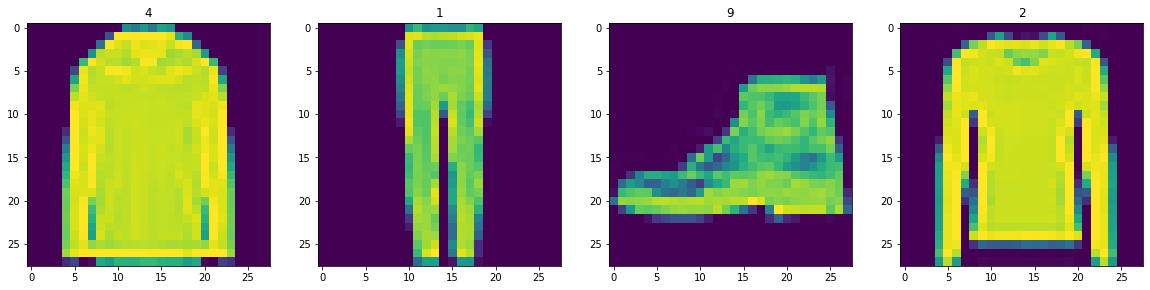

In [13]:
# subplot set-up
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Looping through the images 4 per-batch
for idx in range(4):
#     Grapping the image and Label
    sample = dataiterator.next()
#     Plotting the image using a specific subplot
#    
    ax[idx].imshow(np.squeeze(sample['image']))
#     Assigning the title to the label of each image 
    ax[idx].title.set_text(sample['label'])

### Data Pipeline Building and Preprocessing
##### Steps in building a Data Pipeline includes:-
+ Fetch, Map, Cache, Shuffle, Batch, Prefetch

In [14]:
# Function for scaling the image btw 0 -1 for better perfomance 
def scale_images(data):
    image = data['image']
    return image / 255

In [15]:
# Reloading the dataset 
ds = tfds.load('fashion_mnist', split='train')

# Running the dataset the scaling function above.
ds = ds.map(scale_images)

# Cache dataset 
ds = ds.cache()

# Shufling the ddata
ds = ds.shuffle(60000)

# Batching by 128 per sample. 
ds = ds.batch(128)

# Reducing the bottleneck to 64 prefecth
ds = ds.prefetch(64)

In [16]:
#  converting to numpy array and checking the shape.
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

### Neural Network

In [17]:
# Modelling Components 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D


In [18]:
# Creating a function for the Generator

def build_generator ():
#     Building the model 
    model = Sequential()
    
#     Taking random numbers and reshaping them to 7*7*128 
    model.add(Dense(7*7*128, input_dim=(128)))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling Block
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling Block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional Block
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional Block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv Layer to get to one chaneel 
    model.add(Conv2D(1,4, padding='same', activation='sigmoid'))
    
    return model
    

In [19]:
generator = build_generator()

In [20]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [21]:
img = generator.predict(np.random.randn(4,128,1))

img.shape

1/1 [==============================] - 0s 216ms/step


(4, 28, 28, 1)

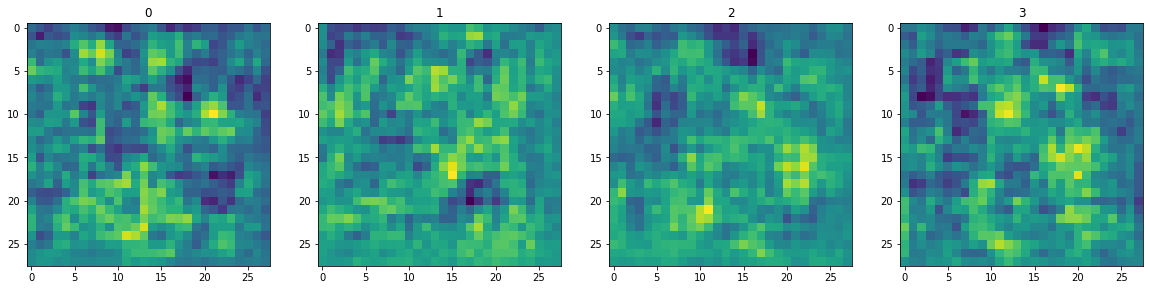

In [22]:
# Testing the generator model by with Random image



# Visualization of the random numbers generated 

# subplot set-up
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Looping through the images 4 per-batch
for idx, img in enumerate(img):
#     Plotting the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [23]:
# Defining a function for the discriminator 

def build_discriminator():
    model = Sequential()
    
#     Convolutional Block 
    model.add(Conv2D(32, 5, input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #     Convolutional Block 2
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #     Convolutional Block 3
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #     Convolutional Block 4
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten and adind a dense layer
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [24]:
discriminator = build_discriminator()

In [25]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [29]:
# img = img[0]

In [30]:
# img.shape

In [28]:
# discriminator.predict(np.expand_dims(img,0))

## Custom Training Loop
+ This is a custom training loop to train bith the generator and the discriminator simultenously.
###### Training a GAN can be quite hardcore, this can be because we need to find a balance at which the generator and the discriminator trains by ensuring that the they both dont train too fast which is where the chuck of task is. However, this can be best resolved by adding some random noise to the output from the discrimnator to kind of trick it and slow it down a little bit.

In [31]:
# Setting up and importing Losses and Optimizers

from tensorflow.keras.optimizers import Adam # optimizer for both the generator and discriminator.
from tensorflow.keras.losses import BinaryCrossentropy # loss for both the gen. and dis. as well

In [32]:
# Defining learning rates and Losses 

# Here the generator has a higher learning rate the discriminator,
# this will make the generator learn faster than the discriminator.
gen_opt = Adam(learning_rate=0.0001)
dis_opt = Adam(learning_rate=0.00001)

# They both use Binarycrossentrophy as a loss function 
gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

##### Building a Subclass Model

In [33]:
# Base class model 
from tensorflow.keras.models import Model

In [34]:
tf.random.normal((128, 128, 1))

<tf.Tensor: shape=(128, 128, 1), dtype=float32, numpy=
array([[[ 1.1148657 ],
        [-0.26057124],
        [ 0.6226364 ],
        ...,
        [ 0.42765075],
        [ 0.45697483],
        [-0.6712987 ]],

       [[-1.3025991 ],
        [-0.11986517],
        [-0.39118013],
        ...,
        [-0.26568252],
        [ 0.6984641 ],
        [ 0.38243097]],

       [[ 0.6199661 ],
        [ 0.82198274],
        [-1.9290223 ],
        ...,
        [-1.4431212 ],
        [-0.60477424],
        [ 0.03381964]],

       ...,

       [[ 0.14243335],
        [ 0.03162371],
        [ 0.19784689],
        ...,
        [ 0.73710847],
        [-0.13294233],
        [ 0.39558443]],

       [[-0.05545871],
        [ 1.6994534 ],
        [ 0.8250152 ],
        ...,
        [ 0.5999934 ],
        [ 0.9302944 ],
        [-0.4330104 ]],

       [[ 0.45905808],
        [ 0.72484905],
        [ 0.9142526 ],
        ...,
        [ 1.1815517 ],
        [-0.93948656],
        [ 0.2848203 ]]], dtype=float32)

In [36]:
tf.ones_like(tf.random.normal((128, 128)))

<tf.Tensor: shape=(128, 128), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [37]:
tf.zeros_like(tf.random.normal((128, 128)))

<tf.Tensor: shape=(128, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [38]:
tf.concat([tf.ones_like(tf.random.normal((128,128))),tf.zeros_like(tf.random.normal((128,128)))], axis=0)

<tf.Tensor: shape=(256, 128), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [52]:
# Creating a Class for the model 

class FashionGAN(Model):
#     initialization function with 2 paramaters and any positional and keyword arguments
    def __init__(self, generator, discriminator,*args, **kwargs):
        # passing through attributes to basse class
        super().__init__(*args,**kwargs)
        
        #Creating attributes for the GEN and DISCR.
        self.generator = generator
        self.discriminator = discriminator
        
    def compile (self, gen_opt, dis_opt, gen_loss, dis_loss, *args, **kwargs):
        # COmpile with base class
        super().compile(*args, **kwargs)
        
        # Creating attributes for loss and optimixers
        self.gen_opt = gen_opt
        self.dis_opt = dis_opt
        self.gen_loss = gen_loss
        self.dis_loss = dis_loss
        
    def train_step(self, batch):
        # Get data
        real_images = batch 
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        
        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images , training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fake images 
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the True output
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0.15)
            
            # Calculate loss - BinaryCross
            total_d_loss = self.dis_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation -neural networl Learn
        dgrd = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt_apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        
        # Train for the generator
        
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            
            # Calculating the Loss - BinaryCrossEntrophy faking the discriminator 
            total_g_loss = self.g_toss(tf.zeros_like(predicted_labels), predicted_labels)
            
        # Applying back prop
        
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        
        
        return {'d_loss':total_d_loss, 'g_loss':total_g_loss}
            

In [53]:
# Creating an instance of Fashion GAN subclassed model

fashgan = FashionGAN(generator, discriminator)

In [54]:
# Compilling the model
fashgan.compile(gen_opt, dis_opt, gen_loss, dis_loss)

#### Call Back 

In [55]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

### Train

In [56]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [57]:
# 2000 epochs is recommended
hist = fashgan.fit(ds, epochs=25)

Epoch 1/25


TypeError: in user code:

    File "C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_4404\1366961181.py", line 42, in train_step
        y_realfake += tf.concat([noise_real, noise_fake], axis=0.15)

    TypeError: Value passed to parameter 'axis' has DataType float32 not in list of allowed values: int32, int64


###### Credits
- Nicholas Renotte
- https://www.youtube.com/watch?v=AALBGpLbj6Q&t=6580s
- https://www.youtube.com/watch?v=AALBGpLbj6Q&t=6587s